## Ejemplo: Optimización de la función X $f(\mathbf{x})=(x_0+2z_1-7)^2+(2x_0+x_1-5)^2$ con Descenso de Gradiente

In [14]:
import numpy as np
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [252]:

# función Booth (un solo óptimo global, diferenciable)
def booth(X):
    x = X[0]
    y = X[1]
    return (x**2+y-11)**2 + (x+y**2-7)**2

# Derivada de Booth
def dbooth(X):
    
    #d f/ d x
    pd1 = 4*X[0]**3+4*X[0]*X[1]-44*X[0]+2*X[0]+2*X[1]**2-14
    
    #d f/ d y
    pd2 = 2*(X[0]**2+X[0]-11)+4*X[0]*X[1]+4*X[1]**3-28*X[1]
    
    return np.array([pd1,pd2])

def hbooth(X):
    
    
    #2da Derivada parcial \partial f/ \partial x^2_1
    #(2*X[0]*2*X[0]**2)+2*X[0]*2*X[1]-2*X[0]*2*11) + 2*(X[0]+X[1]**2-7)*(1)
    #12*X[0]**2+4*X[1]-44+2
    x = X[0]
    y = X[1]
    
    dx1x1 = 12*x**2+4*y-44+2
    
    #2da Derivada parcial \partial f/ \partial x_1 x_2
    dx1x2 = 4*X[0]+4*X[1]
    
    dx2x2 = 12*y**2 + 4*x -26
    
    #Tenemos la información suficiente para crear la matriz Hessiana ya que es simétrica.
    
    M = np.array([[dx1x1,dx1x2],[dx1x2,dx2x2]])
    
    return M


#una función que envuelve boot para usarla directamente con las funciones de matplotlib
def wrapBooth(x,y):

    X = [x,y]
    return booth(X)



In [253]:
#rango
r_min,r_max = -5, 5

#ejes
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

#malla de valores evaluados por f(x,y)
x, y = np.meshgrid(xaxis, yaxis)

#evaluacion de los valores en la malla
results = wrapBooth(x, y)

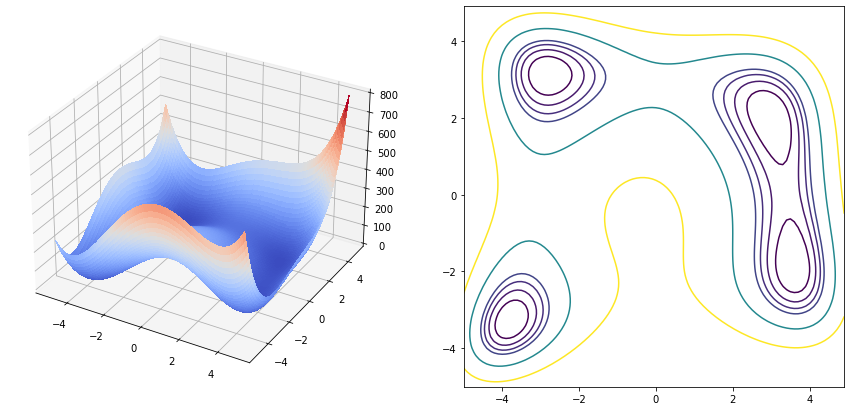

In [254]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

surf = ax.plot_surface(x, y, results, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo

ax.contour(x, y, results,[10,20,30,40,80,160])

plt.show()

In [82]:
2*[0]+2*X[1]**2-14

array([4., 4.])

In [72]:
g

array([array([322, 322]), -78], dtype=object)

In [29]:
g.T@g

7065.0

In [58]:



h = hbooth(X)

e = (g.T@g/(g.T@h@g)).flatten()

e * dbooth(X)

<ipython-input-54-1e292ef7695b>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([pd1,pd2])


array([array([-0.97981066, -0.97981066]), 0.7348579950624793],
      dtype=object)

In [286]:
#solución inicial x_0

X_0 = np.array([0,0]).T

 

apt = list([])
sol = list([])
G = list([])
GN = list([])

for i in range(1000):
    
    apt.append(booth(X_0))
    
    sol.append(list(X_0))

    g = dbooth(X_0)
    
    h = hbooth(X_0)
    
    #si g.T@h@g es positiva podemos hacer
    G.append(g.T@h@g)
    GN.append(g.T@g)
    e = 0.001
    
#    if (g.T@h@g) > 0:
#        e = g.T@g/(g.T@h@g)
        
#    X_0 = X_0 - (e)*g
    X_0 = X_0 - np.linalg.inv(h)@g
    
    # si no, un valor pequeño de epsilon
    #X_0 = X_0 - 0.001*g

    
    

In [287]:
np.linalg.inv(h)@g

array([0., 0.])

In [288]:
hbooth(X_0)

array([[-44.49557256,  -4.5336998 ],
       [ -4.5336998 , -18.32803338]])

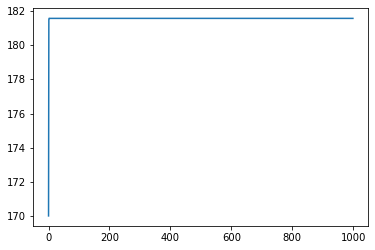

In [289]:
plt.plot(apt)

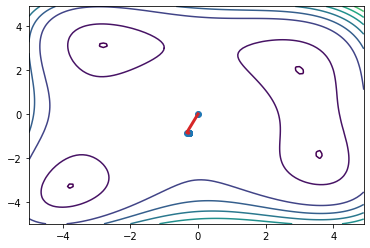

In [290]:
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

In [12]:
X = [-7.5,5]

#e =0.08

aptn = list([])
soln = list([])

for i in range(100):
    aptn.append(booth(X))
    soln.append(list(X))
    
    Hinv = np.linalg.inv(hbooth(X))
    X_next = X - Hinv@np.array(dbooth(X))
    
    X = X_next

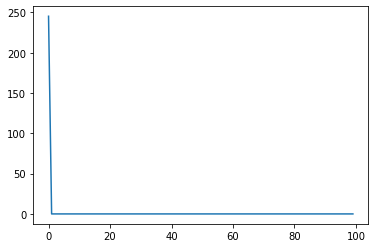

In [13]:
plt.plot(aptn)

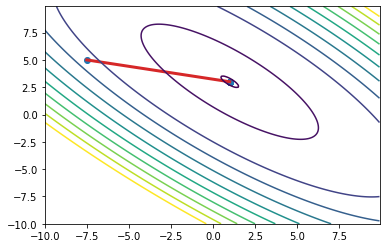

In [28]:
plt.scatter(np.array(soln)[:,0], np.array(soln)[:,1])
plt.plot(np.array(soln)[:,0], np.array(soln)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

https://towardsdatascience.com/optimization-eye-pleasure-78-benchmark-test-functions-for-single-objective-optimization-92e7ed1d1f12